## 03 Feature Engineering

#### Import relevant libraries

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#### Load processed dataset

In [2]:
input_dir = os.path.join('..', 'data', 'processed')
data_df = pd.read_csv(os.path.join(input_dir, 'processed_data.csv'))
data_df

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,utype,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_purchased_power,generation_renewables_and_storage,generation_steam,energy_burden,normalized_expenditure
0,2.0,2005,375.031464,7.084629,9.540319,140.598363,24.935923,79.832394,93.020037,115.705892,...,vert_int,0.001164,4.436797,13.738337,5.483874,8.473223,0.0,49.987032,0.074330,58.230382
1,2.0,2006,403.967434,8.175744,20.977633,150.312633,25.845165,83.786720,112.218061,136.302804,...,vert_int,0.002765,2.812857,14.039622,6.153681,8.771999,0.0,50.243436,0.077073,62.643442
2,2.0,2007,362.674741,9.373432,25.958163,162.860281,26.922500,86.942468,136.816315,146.322099,...,vert_int,1.237031,1.403520,13.097867,6.950935,9.521604,0.0,51.081573,0.077817,68.504013
3,2.0,2008,389.722554,12.139279,17.184093,161.259248,25.216835,87.957893,136.354090,157.862545,...,vert_int,1.300172,2.477033,14.073225,7.199782,9.015558,0.0,49.206599,0.084360,77.980988
4,2.0,2009,368.234034,10.900991,22.232564,178.909959,25.595063,94.547352,144.596841,136.960261,...,vert_int,0.684756,5.903936,13.973577,8.799929,5.808104,0.0,41.204845,0.079537,75.029720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000004,0.818070,0.0,0.254507,0.026651,89.314366
1900,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000003,0.788461,0.0,0.349109,0.022660,84.613601
1901,428.0,2018,337.354284,419.012129,-44.482765,218.418440,0.000000,0.000000,105.759399,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000000,0.846027,0.0,0.000000,0.024630,91.332083
1902,428.0,2019,304.415689,348.490451,-10.125463,228.879953,0.000000,0.000000,68.613095,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000000,0.823920,0.0,0.000000,0.022495,86.141633


In [3]:
is_after_2010 = data_df['year'] >= 2010  #inclusive
data_after_2010_df = data_df[is_after_2010]
data_after_2010_df

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,utype,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_purchased_power,generation_renewables_and_storage,generation_steam,energy_burden,normalized_expenditure
5,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,...,vert_int,0.595833,3.707895,13.169684,10.337048,4.793492,0.0,44.022450,0.085455,81.914792
6,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,...,vert_int,0.049948,3.038090,14.431250,10.666586,4.675221,0.0,39.396937,0.080163,82.985589
7,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,...,vert_int,0.070519,2.660740,14.762977,10.724467,5.435726,0.0,33.224328,0.076958,85.326926
8,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,...,vert_int,0.085471,5.624866,14.098022,10.739554,4.010261,0.0,35.701607,0.075527,81.653615
9,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,...,vert_int,0.096536,3.892956,14.505389,10.738816,6.554533,0.0,35.361499,0.078724,85.140294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000004,0.818070,0.0,0.254507,0.026651,89.314366
1900,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000003,0.788461,0.0,0.349109,0.022660,84.613601
1901,428.0,2018,337.354284,419.012129,-44.482765,218.418440,0.000000,0.000000,105.759399,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000000,0.846027,0.0,0.000000,0.024630,91.332083
1902,428.0,2019,304.415689,348.490451,-10.125463,228.879953,0.000000,0.000000,68.613095,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000000,0.823920,0.0,0.000000,0.022495,86.141633


In [4]:
data_df.columns

Index(['respondent_id', 'year', 'bill_gas', 'bill_other fuel',
       'bill_adjustment', 'bill_distribution', 'bill_hydro', 'bill_nuclear',
       'bill_other', 'bill_other_fossil', 'bill_purchased_power',
       'bill_renewables', 'bill_steam', 'bill_transmission', 'expenditure_gas',
       'expenditure_other fuel', 'expenditure_adjustment',
       'expenditure_distribution', 'expenditure_hydro', 'expenditure_nuclear',
       'expenditure_other', 'expenditure_other_fossil',
       'expenditure_purchased_power', 'expenditure_renewables',
       'expenditure_steam', 'expenditure_transmission', 'housing_units',
       'income', 'asset_value_distribution', 'asset_value_hydro',
       'asset_value_nuclear', 'asset_value_other', 'asset_value_other_fossil',
       'asset_value_renewables', 'asset_value_steam',
       'asset_value_transmission', 'earnings_value_distribution',
       'earnings_value_hydro', 'earnings_value_nuclear',
       'earnings_value_other', 'earnings_value_other_fossil',

#### Create target variable

In [5]:
# Target variable
normalized_expenditure = data_df.reset_index()[['respondent_id', 'year', 'normalized_expenditure']]
normalized_expenditure

,respondent_id,year,normalized_expenditure
0,2.0,2005,58.230382
1,2.0,2006,62.643442
2,2.0,2007,68.504013
3,2.0,2008,77.980988
4,2.0,2009,75.029720
...,...,...,...
1899,428.0,2016,89.314366
1900,428.0,2017,84.613601
1901,428.0,2018,91.332083
1902,428.0,2019,86.141633


In [6]:
pivot_df = normalized_expenditure.pivot_table(
    index='respondent_id', 
    columns='year', 
    aggfunc='first',
    values='normalized_expenditure')
pivot_df

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
respondent_id,,,,,,,,,,,,,,,,
2.0,58.230382,62.643442,68.504013,77.980988,75.029720,81.914792,82.985589,85.326926,81.653615,85.140294,86.982210,88.978139,92.058930,88.288201,93.006540,93.178476
3.0,83.173105,81.928344,87.053359,135.931113,97.537601,95.479855,106.727718,104.773252,111.581812,104.857121,103.807989,107.545623,114.295111,113.384982,129.031256,115.622007
6.0,41.431378,45.370765,48.360649,54.035775,65.507608,69.367903,66.066211,69.907790,70.177850,83.347911,83.078158,83.816495,83.976018,82.160364,82.109218,83.603337
7.0,68.022316,78.226997,90.008022,96.354499,97.933655,98.997047,99.797568,99.659742,106.576783,104.924547,102.972675,108.199393,114.011420,118.373355,106.538090,108.472808
8.0,59.128989,64.244226,63.496835,73.024992,68.334364,65.970388,67.358778,68.124461,70.739363,65.615480,68.331868,64.718398,68.041586,62.305216,67.897712,73.427857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281.0,68.442735,74.740886,69.839062,71.952150,77.968428,84.955709,80.353551,79.165313,87.303997,88.462387,89.693724,93.783086,91.543274,94.802702,91.590953,92.026476
288.0,97.649578,97.938741,98.184279,105.605201,92.426561,80.022669,75.504112,76.678799,80.392296,90.927839,97.469567,100.126516,88.552988,84.503183,78.797925,88.826783
290.0,106.353331,124.048949,124.031824,130.012682,122.420456,112.604757,103.994461,105.624297,108.344476,121.049820,124.162454,108.254810,116.046904,121.143610,131.633190,130.387188


In [7]:
#t = 10
pivot_df['normalized_expenditure_cagr'] = (pivot_df[2020]/pivot_df[2010])**0.1 - 1
pivot_df

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,normalized_expenditure_cagr
respondent_id,,,,,,,,,,,,,,,,,
2.0,58.230382,62.643442,68.504013,77.980988,75.029720,81.914792,82.985589,85.326926,81.653615,85.140294,86.982210,88.978139,92.058930,88.288201,93.006540,93.178476,0.012967
3.0,83.173105,81.928344,87.053359,135.931113,97.537601,95.479855,106.727718,104.773252,111.581812,104.857121,103.807989,107.545623,114.295111,113.384982,129.031256,115.622007,0.019325
6.0,41.431378,45.370765,48.360649,54.035775,65.507608,69.367903,66.066211,69.907790,70.177850,83.347911,83.078158,83.816495,83.976018,82.160364,82.109218,83.603337,0.018841
7.0,68.022316,78.226997,90.008022,96.354499,97.933655,98.997047,99.797568,99.659742,106.576783,104.924547,102.972675,108.199393,114.011420,118.373355,106.538090,108.472808,0.009183
8.0,59.128989,64.244226,63.496835,73.024992,68.334364,65.970388,67.358778,68.124461,70.739363,65.615480,68.331868,64.718398,68.041586,62.305216,67.897712,73.427857,0.010767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281.0,68.442735,74.740886,69.839062,71.952150,77.968428,84.955709,80.353551,79.165313,87.303997,88.462387,89.693724,93.783086,91.543274,94.802702,91.590953,92.026476,0.008027
288.0,97.649578,97.938741,98.184279,105.605201,92.426561,80.022669,75.504112,76.678799,80.392296,90.927839,97.469567,100.126516,88.552988,84.503183,78.797925,88.826783,0.010492
290.0,106.353331,124.048949,124.031824,130.012682,122.420456,112.604757,103.994461,105.624297,108.344476,121.049820,124.162454,108.254810,116.046904,121.143610,131.633190,130.387188,0.014770


In [8]:
target = pivot_df['normalized_expenditure_cagr'].reset_index(drop=True)
target

0      0.012967
1      0.019325
2      0.018841
3      0.009183
4      0.010767
         ...   
111    0.008027
112    0.010492
113    0.014770
114    0.029475
115   -0.024404
Name: normalized_expenditure_cagr, Length: 116, dtype: float64

In [9]:
data_after_2010_df.head()

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,utype,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_purchased_power,generation_renewables_and_storage,generation_steam,energy_burden,normalized_expenditure
5,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,...,vert_int,0.595833,3.707895,13.169684,10.337048,4.793492,0.0,44.022450,0.085455,81.914792
6,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,...,vert_int,0.049948,3.038090,14.431250,10.666586,4.675221,0.0,39.396937,0.080163,82.985589
7,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,...,vert_int,0.070519,2.660740,14.762977,10.724467,5.435726,0.0,33.224328,0.076958,85.326926
8,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,...,vert_int,0.085471,5.624866,14.098022,10.739554,4.010261,0.0,35.701607,0.075527,81.653615
9,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,...,vert_int,0.096536,3.892956,14.505389,10.738816,6.554533,0.0,35.361499,0.078724,85.140294


#### Prepare DataFrames for Investments

In [10]:
investment_column_names = ['respondent_id', 'investment_value_distribution',
       'investment_value_hydro', 'investment_value_nuclear',
       'investment_value_other', 'investment_value_other_fossil',
       'investment_value_renewables', 'investment_value_steam',
       'investment_value_transmission', 'sales']

In [11]:
# Create a DataFranme of utility investments

sum_investments_sales_df = data_after_2010_df[investment_column_names].groupby(by=["respondent_id"]).sum()
investment_column_names.remove('respondent_id')
sum_investments_sales_df

,investment_value_distribution,investment_value_hydro,investment_value_nuclear,investment_value_other,investment_value_other_fossil,investment_value_renewables,investment_value_steam,investment_value_transmission,sales
respondent_id,,,,,,,,,
2.0,4.122966e+09,401837956.0,9.306870e+08,4.714471e+09,8.419062e+08,5.482545e+07,5.389831e+09,2.662579e+09,711088355.0
3.0,1.593899e+07,11378848.0,0.000000e+00,1.093068e+07,0.000000e+00,0.000000e+00,0.000000e+00,9.275973e+06,4253672.0
6.0,2.242890e+09,100494780.0,0.000000e+00,4.571355e+08,0.000000e+00,0.000000e+00,1.831950e+09,2.279097e+09,428325860.0
7.0,3.157227e+09,0.0,7.497268e+08,2.100995e+09,1.567304e+09,8.982726e+08,1.079611e+09,1.578813e+09,352766341.0
8.0,1.934680e+09,17928575.0,1.159162e+09,8.035705e+08,0.000000e+00,0.000000e+00,1.700975e+08,1.575136e+09,330248085.0
...,...,...,...,...,...,...,...,...,...
281.0,2.146506e+09,0.0,0.000000e+00,5.060051e+08,7.507275e+08,1.802862e+09,1.063686e+09,0.000000e+00,192945960.0
288.0,2.069657e+08,0.0,0.000000e+00,6.311957e+07,2.597997e+06,2.815807e+07,0.000000e+00,1.070905e+08,23726324.0
290.0,1.972978e+08,0.0,0.000000e+00,4.232020e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,13446757.0


In [12]:
sum_investments_sales_df['sum_investments'] = sum_investments_sales_df[investment_column_names].sum(axis=1)
sum_investments_sales_df['sum_investments_generation'] = sum_investments_sales_df['sum_investments'] - sum_investments_sales_df['investment_value_transmission'] - sum_investments_sales_df['investment_value_distribution']
sum_investments_sales_df

,investment_value_distribution,investment_value_hydro,investment_value_nuclear,investment_value_other,investment_value_other_fossil,investment_value_renewables,investment_value_steam,investment_value_transmission,sales,sum_investments,sum_investments_generation
respondent_id,,,,,,,,,,,
2.0,4.122966e+09,401837956.0,9.306870e+08,4.714471e+09,8.419062e+08,5.482545e+07,5.389831e+09,2.662579e+09,711088355.0,1.983019e+10,1.304465e+10
3.0,1.593899e+07,11378848.0,0.000000e+00,1.093068e+07,0.000000e+00,0.000000e+00,0.000000e+00,9.275973e+06,4253672.0,5.177816e+07,2.656320e+07
6.0,2.242890e+09,100494780.0,0.000000e+00,4.571355e+08,0.000000e+00,0.000000e+00,1.831950e+09,2.279097e+09,428325860.0,7.339893e+09,2.817906e+09
7.0,3.157227e+09,0.0,7.497268e+08,2.100995e+09,1.567304e+09,8.982726e+08,1.079611e+09,1.578813e+09,352766341.0,1.148472e+10,6.748676e+09
8.0,1.934680e+09,17928575.0,1.159162e+09,8.035705e+08,0.000000e+00,0.000000e+00,1.700975e+08,1.575136e+09,330248085.0,5.990823e+09,2.481007e+09
...,...,...,...,...,...,...,...,...,...,...,...
281.0,2.146506e+09,0.0,0.000000e+00,5.060051e+08,7.507275e+08,1.802862e+09,1.063686e+09,0.000000e+00,192945960.0,6.462733e+09,4.316227e+09
288.0,2.069657e+08,0.0,0.000000e+00,6.311957e+07,2.597997e+06,2.815807e+07,0.000000e+00,1.070905e+08,23726324.0,4.316582e+08,1.176020e+08
290.0,1.972978e+08,0.0,0.000000e+00,4.232020e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,13446757.0,2.530647e+08,5.576695e+07


#### Prepare DataFrames for Expenditures

In [13]:
expenditure_column_names = ['respondent_id', 'expenditure_gas',
       'expenditure_other fuel', 'expenditure_adjustment',
       'expenditure_distribution', 'expenditure_hydro', 'expenditure_nuclear',
       'expenditure_other', 'expenditure_other_fossil',
       'expenditure_purchased_power', 'expenditure_renewables',
       'expenditure_steam', 'expenditure_transmission']

In [14]:
sum_expenditures_df = data_after_2010_df[expenditure_column_names].groupby(by=["respondent_id"]).sum()
expenditure_column_names = expenditure_column_names.remove('respondent_id')
sum_expenditures_df

,expenditure_gas,expenditure_other fuel,expenditure_adjustment,expenditure_distribution,expenditure_hydro,expenditure_nuclear,expenditure_other,expenditure_other_fossil,expenditure_purchased_power,expenditure_renewables,expenditure_steam,expenditure_transmission
respondent_id,,,,,,,,,,,,
2.0,5.132308e+09,1.383818e+08,1.154110e+09,3.828276e+09,5.544618e+08,2.282221e+09,2.405275e+09,2.067986e+09,1.489665e+09,1.176959e+07,9.084542e+09,1.950072e+09
3.0,2.882324e+07,2.040340e+08,-6.762004e+07,2.969037e+07,5.227997e+07,0.000000e+00,9.763331e+07,1.528938e+07,4.715983e+07,0.000000e+00,0.000000e+00,1.830169e+07
6.0,2.836928e+09,9.615715e+08,-7.210860e+08,2.290124e+09,1.512317e+08,0.000000e+00,6.603258e+08,2.607276e+08,3.003127e+09,0.000000e+00,6.127269e+09,1.852221e+09
7.0,3.309975e+09,8.289884e+07,-6.541575e+08,3.825312e+09,-1.939861e+06,2.556462e+09,2.064731e+09,3.710783e+09,1.972733e+09,4.508811e+08,3.033181e+09,1.825703e+09
8.0,2.605195e+09,1.507844e+08,-1.236624e+08,1.218794e+09,2.140047e+07,2.131851e+09,1.322763e+09,3.104126e+08,1.545107e+09,0.000000e+00,1.454663e+09,6.925835e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
281.0,3.309155e+09,1.032936e+08,-5.566223e+08,1.163924e+09,0.000000e+00,0.000000e+00,8.970489e+08,7.006013e+08,1.147378e+09,2.256087e+08,1.419898e+09,1.180497e+09
288.0,3.185888e+08,6.995229e+06,-6.080040e+07,1.826391e+08,0.000000e+00,0.000000e+00,1.250259e+08,1.608683e+08,3.889133e+08,8.437912e+06,0.000000e+00,1.411904e+08
290.0,6.297315e+08,6.775422e+08,2.369448e+07,2.231765e+08,0.000000e+00,0.000000e+00,9.934202e+07,4.451915e+04,3.548869e+08,0.000000e+00,0.000000e+00,1.517976e+08


In [15]:
# Experiencing some errors selecting columns, so respondent id is included in this sum.
# It should not be significant due to the magnitude of the numbers we are working with.
sum_expenditures_df['sum_expenditures'] = sum_expenditures_df.sum(axis=1)
sum_expenditures_df

,expenditure_gas,expenditure_other fuel,expenditure_adjustment,expenditure_distribution,expenditure_hydro,expenditure_nuclear,expenditure_other,expenditure_other_fossil,expenditure_purchased_power,expenditure_renewables,expenditure_steam,expenditure_transmission,sum_expenditures
respondent_id,,,,,,,,,,,,,
2.0,5.132308e+09,1.383818e+08,1.154110e+09,3.828276e+09,5.544618e+08,2.282221e+09,2.405275e+09,2.067986e+09,1.489665e+09,1.176959e+07,9.084542e+09,1.950072e+09,3.009907e+10
3.0,2.882324e+07,2.040340e+08,-6.762004e+07,2.969037e+07,5.227997e+07,0.000000e+00,9.763331e+07,1.528938e+07,4.715983e+07,0.000000e+00,0.000000e+00,1.830169e+07,4.255917e+08
6.0,2.836928e+09,9.615715e+08,-7.210860e+08,2.290124e+09,1.512317e+08,0.000000e+00,6.603258e+08,2.607276e+08,3.003127e+09,0.000000e+00,6.127269e+09,1.852221e+09,1.742244e+10
7.0,3.309975e+09,8.289884e+07,-6.541575e+08,3.825312e+09,-1.939861e+06,2.556462e+09,2.064731e+09,3.710783e+09,1.972733e+09,4.508811e+08,3.033181e+09,1.825703e+09,2.217656e+10
8.0,2.605195e+09,1.507844e+08,-1.236624e+08,1.218794e+09,2.140047e+07,2.131851e+09,1.322763e+09,3.104126e+08,1.545107e+09,0.000000e+00,1.454663e+09,6.925835e+08,1.132989e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281.0,3.309155e+09,1.032936e+08,-5.566223e+08,1.163924e+09,0.000000e+00,0.000000e+00,8.970489e+08,7.006013e+08,1.147378e+09,2.256087e+08,1.419898e+09,1.180497e+09,9.590783e+09
288.0,3.185888e+08,6.995229e+06,-6.080040e+07,1.826391e+08,0.000000e+00,0.000000e+00,1.250259e+08,1.608683e+08,3.889133e+08,8.437912e+06,0.000000e+00,1.411904e+08,1.271859e+09
290.0,6.297315e+08,6.775422e+08,2.369448e+07,2.231765e+08,0.000000e+00,0.000000e+00,9.934202e+07,4.451915e+04,3.548869e+08,0.000000e+00,0.000000e+00,1.517976e+08,2.160216e+09


#### Prepare DataFrames for Generation Mix

In [16]:
gen_column_names = ['respondent_id',
                    'generation_ee_dr', 
                    'generation_hydro', 
                    'generation_nuclear', 
                    'generation_other_fossil', 
                    'generation_steam', 
                    'generation_purchased_power', 
                    'generation_renewables_and_storage']

In [17]:
gen_mwh_df = data_after_2010_df[gen_column_names].groupby(by=['respondent_id']).sum().reset_index()
gen_mwh_df['sum_total_generation'] = gen_mwh_df.drop('respondent_id', axis=1).sum(axis=1)
gen_mwh_df['sum_generation_wo_purchased'] = gen_mwh_df.drop(['respondent_id','sum_total_generation', 'generation_purchased_power'], axis=1).sum(axis=1)
gen_mwh_df['sum_fossil_generation'] = gen_mwh_df['generation_steam'] + gen_mwh_df['generation_other_fossil']
gen_mwh_df['sum_clean_generation'] = gen_mwh_df['generation_hydro'] + gen_mwh_df['generation_nuclear'] + gen_mwh_df['generation_renewables_and_storage']
gen_mwh_df.head()

,respondent_id,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage,sum_total_generation,sum_generation_wo_purchased,sum_fossil_generation,sum_clean_generation
0,2.0,1.573564,44.440870,156.718165,121.418686,367.572053,69.316441,0.104373,761.144152,691.827711,488.990739,201.263408
1,3.0,0.154320,1.745414,0.000000,0.004462,0.000000,2.970867,0.000000,4.875063,1.904196,0.004462,1.745414
2,6.0,2.301923,6.638255,0.000000,33.836289,226.739094,181.360370,-0.000532,450.875398,269.515028,260.575383,6.637723
3,7.0,37.279921,0.000000,101.779936,78.367715,103.697013,81.993071,3.871580,406.989237,324.996166,182.064728,105.651516
4,8.0,7.991414,1.505050,152.442479,55.169604,69.531089,69.950383,0.000000,356.590018,286.639635,124.700692,153.947529


#### Prepare DataFrames for Bills

In [18]:
bill_column_names = ['respondent_id', 'bill_gas', 'bill_other fuel',
       'bill_adjustment', 'bill_distribution', 'bill_hydro', 'bill_nuclear',
       'bill_other', 'bill_other_fossil', 'bill_purchased_power',
       'bill_renewables', 'bill_steam', 'bill_transmission']

In [19]:
sum_bills_df = data_after_2010_df[bill_column_names].groupby(by=["respondent_id"]).sum()
bill_column_names = bill_column_names.remove('respondent_id')

# Experiencing some errors selecting columns, so respondent id is included in this sum.
# It should not be significant due to the magnitude of the numbers we are working with.
sum_bills_df['sum_bills'] = sum_bills_df.sum(axis=1)
sum_bills_df

,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,bill_purchased_power,bill_renewables,bill_steam,bill_transmission,sum_bills
respondent_id,,,,,,,,,,,,,
2.0,3112.849798,91.867699,722.505017,2397.651783,347.292020,1428.439814,1508.741296,1298.526264,932.665316,7.251702,5702.835851,1221.078770,18771.705330
3.0,1039.013347,9592.164214,-3610.057522,1578.462964,2795.758135,0.000000,5190.673383,804.549527,2512.004816,0.000000,0.000000,974.200009,20876.768872
6.0,2492.989141,934.347519,-694.036696,2205.920362,145.683812,0.000000,635.040939,251.289644,2886.430488,0.000000,5898.707403,1785.539222,16541.911835
7.0,2291.888455,64.010759,-474.081710,2790.104225,-1.473992,1877.509148,1499.625556,2719.986126,1435.407503,324.879991,2216.204948,1328.673630,16072.734640
8.0,3539.049894,204.800539,-160.285125,1616.729997,28.378125,2828.859928,1753.931631,411.205319,2057.549449,0.000000,1931.627131,917.978640,15129.825529
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281.0,5926.665316,187.696145,-1035.572238,2163.386881,0.000000,0.000000,1668.111884,1303.731693,2131.163486,419.041449,2637.799451,2194.358292,17596.382360
288.0,3013.871089,59.328315,-576.979726,1721.097976,0.000000,0.000000,1174.632778,1502.781003,3695.049646,77.144827,0.000000,1320.371195,11987.297102
290.0,6482.254469,6239.562285,259.092912,2436.188675,0.000000,0.000000,1085.240738,0.487741,3887.540777,0.000000,0.000000,1655.217579,22045.585176


#### Prepare DataFrame for Utility Info

In [20]:
utility_info_df = data_after_2010_df[['respondent_id', 'utype']].groupby(by=['respondent_id']).first().reset_index()
utility_info_df.head()

,respondent_id,utype
0,2.0,vert_int
1,3.0,vert_int
2,6.0,vert_int
3,7.0,vert_int
4,8.0,vert_int


#### Create feature variables

__x01__: % of investments that go to transmission and distribution

(array([ 1.,  1.,  6., 21., 13., 13., 14., 11., 17., 19.]),
 array([0.01996292, 0.11278609, 0.20560926, 0.29843243, 0.39125561,
        0.48407878, 0.57690195, 0.66972513, 0.7625483 , 0.85537147,
        0.94819464]),
 <BarContainer object of 10 artists>)

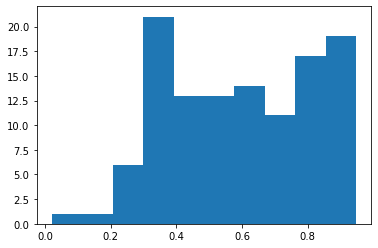

In [21]:
# x1 is the % of investments that go to transmission and distribution
sum_investments_sales_df['pct_poles_and_wires'] = \
    (sum_investments_sales_df['investment_value_transmission'] + \
    sum_investments_sales_df['investment_value_distribution']) / \
    sum_investments_sales_df['sum_investments']
x01_poles_wires_investment_pct = sum_investments_sales_df['pct_poles_and_wires'].reset_index(drop=True)
plt.hist(x01_poles_wires_investment_pct)

__x02__: % of expenditures spent on clean energy

(array([63.,  6.,  8., 10.,  7., 10.,  5.,  3.,  1.,  3.]),
 array([-1.19222957e-04,  7.18543279e-02,  1.43827879e-01,  2.15801429e-01,
         2.87774980e-01,  3.59748531e-01,  4.31722082e-01,  5.03695633e-01,
         5.75669184e-01,  6.47642734e-01,  7.19616285e-01]),
 <BarContainer object of 10 artists>)

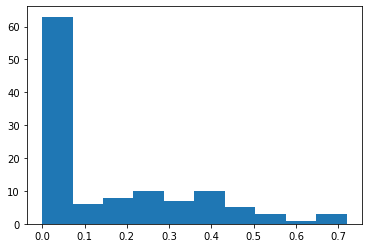

In [22]:
# x2 measures the % of expenitures for "clean" energy (renewables, nuclear, and hydro)
investments_fossil = sum_investments_sales_df['investment_value_steam'] + sum_investments_sales_df['investment_value_other_fossil']
investments_clean = sum_investments_sales_df['investment_value_renewables'] + sum_investments_sales_df['investment_value_nuclear'] + sum_investments_sales_df['investment_value_hydro']
sum_investments_sales_df['pct_renewable_investment'] = np.where(
    sum_investments_sales_df['sum_investments_generation'] != 0,
    investments_clean / sum_investments_sales_df['sum_investments_generation'], 
    0)
x02_renewables_investment_pct = sum_investments_sales_df['pct_renewable_investment'].reset_index(drop=True)
plt.hist(x02_renewables_investment_pct)

__x03__: total investments over sales

(array([ 4.,  9., 16., 24., 26., 19.,  8.,  6.,  2.,  2.]),
 array([ 1.02556261,  5.89829457, 10.77102654, 15.64375851, 20.51649047,
        25.38922244, 30.26195441, 35.13468638, 40.00741834, 44.88015031,
        49.75288228]),
 <BarContainer object of 10 artists>)

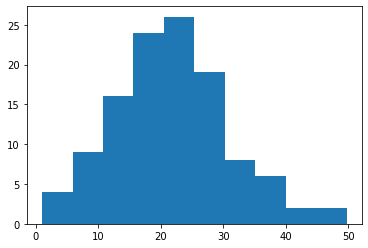

In [23]:
# x3 measures the total investments, divided by sales
sum_investments_sales_df['total_divided_by_sales'] = sum_investments_sales_df['sum_investments']/sum_investments_sales_df['sales']
x03_total_investment_divided_by_sales = sum_investments_sales_df['total_divided_by_sales'].reset_index(drop=True)
x03_total_investment_divided_by_sales[x03_total_investment_divided_by_sales>400] = x03_total_investment_divided_by_sales.median()
plt.hist(x03_total_investment_divided_by_sales)

__x04__: residential / total customers

Note, this is currently done with data from 'housing' and 'customers' columns, but could be done better with the data from customers_sales.csv

In [24]:
customer_names = ['respondent_id', 'housing_units', 'customers']
sum_customers_df = data_after_2010_df[customer_names].groupby(by=["respondent_id"]).sum()
                                      
print(sum_customers_df)

               housing_units   customers
respondent_id                           
2.0               13826176.0  16082769.0
3.0                 157356.0    183423.0
6.0                8929786.0  10540097.0
7.0               11613067.0  13048804.0
8.0                6477428.0   7750180.0
...                      ...         ...
281.0              4471556.0   5606705.0
288.0               918388.0   1035898.0
290.0               718213.0    856027.0
403.0               401883.0    454680.0
428.0               603578.0    682950.0

[116 rows x 2 columns]


(array([10., 72., 28.,  2.,  0.,  3.,  0.,  0.,  0.,  1.]),
 array([0.76082819, 0.8225512 , 0.88427422, 0.94599723, 1.00772025,
        1.06944326, 1.13116628, 1.19288929, 1.25461231, 1.31633532,
        1.37805834]),
 <BarContainer object of 10 artists>)

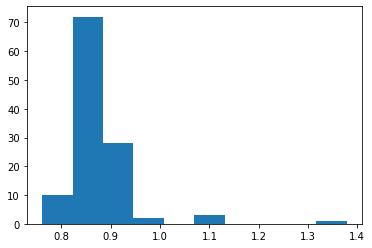

In [25]:
sum_customers_df['residential_ratio'] = sum_customers_df['housing_units']/sum_customers_df['customers']
x04_residential_customer_ratio = sum_customers_df['residential_ratio'].reset_index(drop=True)
plt.hist(x04_residential_customer_ratio)

__x05__: renewable / total generation (mwh)

(array([ 1.,  0.,  0.,  0.,  0., 75., 17., 14.,  1.,  8.]),
 array([-1.24871912, -1.0238472 , -0.79897529, -0.57410338, -0.34923147,
        -0.12435956,  0.10051235,  0.32538427,  0.55025618,  0.77512809,
         1.        ]),
 <BarContainer object of 10 artists>)

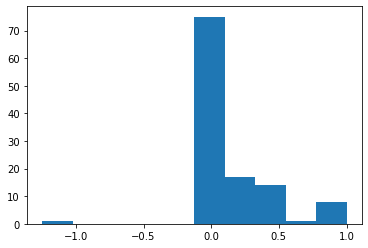

In [26]:
gen_mwh_df['renewable_generation_ratio'] = np.where(
    gen_mwh_df['sum_generation_wo_purchased'] != 0,
    gen_mwh_df['sum_clean_generation'] / gen_mwh_df['sum_generation_wo_purchased'],
    0)
x05_renewable_generation_ratio = gen_mwh_df['renewable_generation_ratio']
plt.hist(x05_renewable_generation_ratio) 

__x06__: nuclear / clean bills ($) <font color=purple>--> deprecated</font>

In [27]:
# x6 measures the ratio of nuclear to clean bills
bills_clean = sum_bills_df['bill_renewables'] + sum_bills_df['bill_nuclear'] + sum_bills_df['bill_hydro']

x06_nuclear_renewable_bill_ratio = sum_bills_df['bill_nuclear']/bills_clean

for index, value in x06_nuclear_renewable_bill_ratio.items():
    v = x06_nuclear_renewable_bill_ratio[index]
    if np.isnan(v):
        x06_nuclear_renewable_bill_ratio[index] = 0

x06_nuclear_renewable_bill_ratio

respondent_id
2.0      0.801151
3.0      0.000000
6.0      0.000000
7.0      0.853058
8.0      0.990068
           ...   
281.0    0.000000
288.0    0.000000
290.0    0.000000
403.0    0.000000
428.0    0.000000
Length: 116, dtype: float64

__x06__: nuclear / clean generation (mwh)

(array([93.,  0.,  2.,  0.,  0.,  0.,  2.,  2.,  1., 16.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

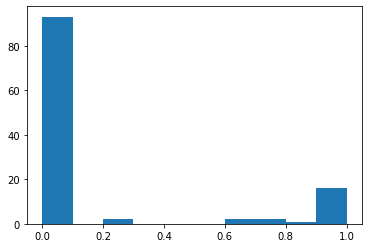

In [28]:
gen_mwh_df['nuclear_renewable_ratio'] = np.where(
    gen_mwh_df['sum_clean_generation'] != 0,
    gen_mwh_df['generation_nuclear'] / gen_mwh_df['sum_clean_generation'],
    0)
x06_nuclear_renewable_mwh_ratio = gen_mwh_df['nuclear_renewable_ratio']
plt.hist(x06_nuclear_renewable_mwh_ratio)

__x07__: hydro / clean bills ($) <font color=purple>--> deprecated</font>

In [29]:
# x07 measures the ratio of hydro to clean bills

x07_hydro_renewable_ratio = sum_bills_df['bill_hydro']/bills_clean

for index, value in x07_hydro_renewable_ratio.items():
    v = x07_hydro_renewable_ratio[index]
    if np.isnan(v):
        x07_hydro_renewable_ratio[index] = 0

x07_hydro_renewable_ratio

respondent_id
2.0      0.194781
3.0      1.000000
6.0      1.000000
7.0     -0.000670
8.0      0.009932
           ...   
281.0    0.000000
288.0    0.000000
290.0    0.000000
403.0    0.000000
428.0    0.000000
Length: 116, dtype: float64

__x07__: hydro / clean generation (mwh)

(array([77.,  7.,  2.,  6.,  1.,  4.,  0.,  0.,  2., 17.]),
 array([-0.09977336,  0.01076953,  0.12131242,  0.23185531,  0.3423982 ,
         0.45294109,  0.56348398,  0.67402687,  0.78456976,  0.89511264,
         1.00565553]),
 <BarContainer object of 10 artists>)

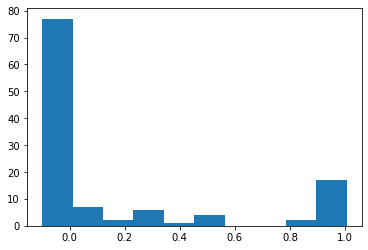

In [30]:
gen_mwh_df['hydro_renewable_ratio'] = np.where(
    gen_mwh_df['sum_clean_generation'] != 0,
    gen_mwh_df['generation_hydro'] / gen_mwh_df['sum_clean_generation'],
    0)
x07_hydro_renewable_mwh_ratio = gen_mwh_df['hydro_renewable_ratio']
plt.hist(x07_hydro_renewable_mwh_ratio)

__x08__: regulatory environment (rps targets)

(array([57., 21., 15.,  6.,  2.,  1.,  4.,  3.,  1.,  6.]),
 array([ 0.        ,  5.09090909, 10.18181818, 15.27272727, 20.36363636,
        25.45454545, 30.54545455, 35.63636364, 40.72727273, 45.81818182,
        50.90909091]),
 <BarContainer object of 10 artists>)

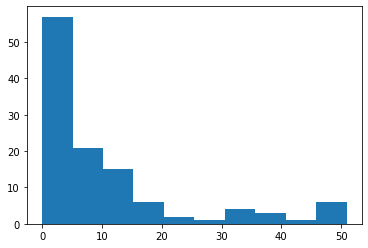

In [31]:
data_from_2020 = data_after_2010_df[data_after_2010_df['year'] == 2020].copy()
data_year_mean = data_after_2010_df.groupby(['respondent_id']).agg({'rps_score': ['mean']}).reset_index(drop=True)
data_year_mean = data_year_mean.droplevel(1, axis=1)
x08_regulatory_rps_target = data_year_mean['rps_score']
plt.hist(x08_regulatory_rps_target)

__c09__: utility type (veritcally integrated, poles and wires only, etc.)

(array([70.,  0.,  0., 31.,  0.,  0., 14.,  0.,  0.,  1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

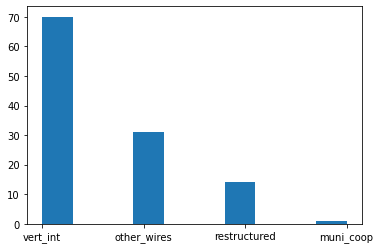

In [32]:
c09_utility_type = utility_info_df['utype']
plt.hist(c09_utility_type)

Consolidate feature variables into model_data table

In [33]:
model_data = pd.DataFrame(
    {
        'target': target, 
        'x01': x01_poles_wires_investment_pct,
        'x02': x02_renewables_investment_pct,
        'x03': x03_total_investment_divided_by_sales,
        'x04': x04_residential_customer_ratio,
        'x05': x05_renewable_generation_ratio,
        'x06': x06_nuclear_renewable_mwh_ratio,
        'x07': x07_hydro_renewable_mwh_ratio,
        'x08': x08_regulatory_rps_target,
        'c09': c09_utility_type,
    }
)
model_data

,target,x01,x02,x03,x04,x05,x06,x07,x08,c09
0,0.012967,0.342183,0.106354,27.887101,0.859689,0.290916,0.778672,0.220809,0.000000,vert_int
1,0.019325,0.486981,0.428369,12.172580,0.857886,0.916615,0.000000,1.000000,0.000000,vert_int
2,0.018841,0.616083,0.035663,17.136237,0.847220,0.024628,0.000000,1.000080,10.487586,vert_int
3,0.009183,0.412378,0.244196,32.556154,0.889972,0.325085,0.963355,0.000000,14.585460,vert_int
4,0.010767,0.585865,0.474441,18.140371,0.835778,0.537077,0.990224,0.009776,0.000000,vert_int
...,...,...,...,...,...,...,...,...,...,...
111,0.008027,0.332136,0.417694,33.495041,0.797537,0.104220,0.000000,0.000000,0.736438,vert_int
112,0.010492,0.727558,0.239435,18.193219,0.886562,0.019952,0.000000,0.000000,11.250000,vert_int
113,0.014770,0.779634,0.000000,18.819757,0.839007,0.000000,0.000000,0.000000,0.000000,other_wires
114,0.029475,0.669580,0.348878,14.202419,0.883881,0.002061,0.000000,0.000000,0.000000,vert_int


#### Check for covariance

In [34]:
# import seaborn as sns
# sns.pairplot(model_data.drop(columns=['target']))

In [35]:
corr = model_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,target,x01,x02,x03,x04,x05,x06,x07,x08
target,1.000000,-0.260441,0.193977,0.200567,-0.117838,0.178259,0.065584,0.237038,-0.019632
x01,-0.260441,1.000000,-0.371784,-0.139896,0.251251,-0.217814,-0.257910,-0.139586,0.132506
x02,0.193977,-0.371784,1.000000,0.269456,-0.184531,0.644130,0.434929,0.195367,0.299691
x03,0.200567,-0.139896,0.269456,1.000000,0.050379,0.111703,0.324150,0.023600,0.310958
x04,-0.117838,0.251251,-0.184531,0.050379,1.000000,-0.104072,-0.022760,-0.106037,0.142404
x05,0.178259,-0.217814,0.644130,0.111703,-0.104072,1.000000,0.385036,0.316093,0.286064
x06,0.065584,-0.257910,0.434929,0.324150,-0.022760,0.385036,1.000000,-0.202189,0.216470
x07,0.237038,-0.139586,0.195367,0.023600,-0.106037,0.316093,-0.202189,1.000000,0.217405
x08,-0.019632,0.132506,0.299691,0.310958,0.142404,0.286064,0.216470,0.217405,1.000000


#### Save model_data file

In [36]:
output_dir = os.path.join('..', 'data', 'processed')

In [37]:
model_data.to_csv(os.path.join(output_dir, 'model_data.csv'), index=False)